# Network type optimizations

# Introduction.
Network type optimizations have this in common that they bring into play
nodes (nodes) and valuéed edges (arcs).

In this study, I will try, once the conventional optimizations discussed,
to study the possibility of adding non -linear parameters in a second step.


Global study proposed by <b> Estelle Derrien - GitHub EstelleDerrien </b>

!!Creation in progress - Subject to heavy modifications !!
 
# Summary

   - 1. <b> Transport </b> (Provision Problem)
         - Description
         - Examples with Python Pulp: minimization of linear transport cost.
            - an example of transport without loads (uncapacited transportation)
            - The same example with loops for.
            - an example of loaded transport (Capacitéd Transportation)
            - The difference in fixed load transport (Fixed Transportation load) and the others.
            - Mathematical modeling
            - Resolution with pulp without loops for
            - Resolution with pulp with buckles for
            - The same example with Gurobi
            - The same example with Python Cplex
            - The same example with the Excel solver
            - The same example with Networkx
         - Transport with a percentage of losses.
         - Second example: maximization of profit and variable taxes.
         - An example with non -linear costs.
         

   - 2. <b> Transport with relays </b> (Transshipment Problem)
         - Description
         - Mathematical modeling
         - an example with Python Pulp
            - Without loops for
            - With loops for
         - Transshipment with an additional warehouse next to the factories (Dummy).
            - With Pulp
      - Addition of non -linear parameters.
              
   - 3. <b> Supplier locations </b> (Facility Rental Or Creation)
         - Description
            - Minimization of the overall positioning cost
            - Minimization of the overall distance.
                  - Euclidean distance vs distance manhattan
         - Mathematical modeling
         - Examples with solvents
         - realistic solutions with Geopanda
         - Addition of non -linear parameters
         
   - 4. <b> Assignment </b> (Assignment Problem)
         - Description
         - Variants
         - Mathematical modeling
         - Examples with Google Or Tools and Pulp
         - Addition of constraints
         - Non -linear affectation


   - 5. <b> Project management. </b> (Critical Management Path)
         - Description
   - 6. <b> Cover problem.</b> (Set Cover - Set Partition Subset)
         - Descriptions
              - a first example with the Glouton algo
              - coverage by under sets minimum
                  - Example 1: Select the neighborhood that covers a whole plan
                  - Mathematical modeling
                  - Solution with Python Pulp
                  - Example 2: Select the minimum number of cameras to cover an entire city
                  - Mathematical modeling
                  - Solution with Python Pulp
              - coverage by under assembly minimum with taking the weight into account
                  - Mathematical modeling
                  - Examples with solvers.
              - minimum summary coverage
                  - Mathematical modeling
                  - Examples with solvers.
              - Maximum coverage
                  - Mathematical modeling
                  - Examples with solvers.



   - <b> Links </b>

# 1. Transports (Transportation problem)

Le Problème générique de base :

<div style="text-align:center">
<img src="img/transport.png">
</div>



# Transport without loads: example with pulp

In this first example, we minimize only the total distance and we ask Pulp to select the roads that have the smallest values, we use binary decision variables.
Here there are only 2 suppliers, but it works with 100 suppliers (with buckles for, otherwise, it would be tedious to write).

<div style="text-align:center">
<img src="img/uncapacited2.jpg"></img>
</div>

In [1]:
from pulp import *
 
# Decision variables contain the decision if you choose a road or not
XA1 = LpVariable('XA1', lowBound=0, cat='Binary')
XA2 = LpVariable('XA2', lowBound=0, cat='Binary')
XA3 = LpVariable('XA3', lowBound=0, cat='Binary')
XA4 = LpVariable('XA4', lowBound=0, cat='Binary')
XA5 = LpVariable('XA5', lowBound=0, cat='Binary')
XB1 = LpVariable('XB1', lowBound=0, cat='Binary')
XB2 = LpVariable('XB2', lowBound=0, cat='Binary')
XB3 = LpVariable('XB3', lowBound=0, cat='Binary')
XB4 = LpVariable('XB4', lowBound=0, cat='Binary')
XB5 = LpVariable('XB5', lowBound=0, cat='Binary')
 
# This is a minimization problem
Problem = LpProblem('optimisation_transport',LpMinimize)
 
# The objective function is to minimize the distance, taking into account each road.
Problem += 3*XA1 + 1*XA2 + 3*XA3 + 2*XA4 + 9*XA5 + 25*XB1 + 15*XB2 + 32*XB3 + 22*XB4 + 8*XB5
 
# Constraints
# We want at least 5 routes to the 5 stores.
Problem += (XA1 + XA2 + XA3 + XA4 + XA5 + XB1 + XB2 + XB3 + XB4 + XB5) >= 5
 
# We reslted
Problem.solve()
 
# We print the result
print('Statut:', LpStatus[Problem.status])
print('Minimized total distance = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Choice of the road:',i.name, '=', i.varValue)

Statut: Optimal
Minimized total distance =  17.0
Choice of the road: XA1 = 1.0
Choice of the road: XA2 = 1.0
Choice of the road: XA3 = 1.0
Choice of the road: XA4 = 1.0
Choice of the road: XB5 = 1.0


# The same example with loops for

We use the lists in understanding.
Often, during transport problems, two tables are associated to create decision variables.
As soon as we have to create all the possible roads, then we use this technique.
(Aaron Stubberfield)

In [2]:
import pulp as p

# decisions variables
fournisseurs = ['A','B']
clients = ['1','2','3','4','5']
costs = [  
# customers     # 1  2  3  4  5
                [3, 1, 3, 2,9],      # A   suppliers
                [25, 15, 32, 22,8],  # B
]

# This is a Minimization problem
Problem = p.LpProblem('optimisation_transport',p.LpMinimize)

# Create a list of all possible roads
Routes = [(w, b) for w in fournisseurs  for b in clients]

#Create a dictionary of road decisions variables
vars = p.LpVariable.dicts("Route", (fournisseurs , clients), 0, None, p.LpBinary)

# Create a dictionary of cost of each road
cost = p.makeDict([fournisseurs,clients], costs, 0)

# Objective function
Problem += p.lpSum([cost[w][b]  * vars[w][b]  for (w, b) in Routes])

# Constraint
Problem += (p.lpSum([ vars[w][b]  for (w, b) in Routes]) >= 5 , "minimum_de_5_routes")

# Solving
Problem.solve()
 
# Printing results
print('Statut:', p.LpStatus[Problem.status])
print('Minimized cost= ', p.value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Chosen routes:',i.name, '=', i.varValue)


Statut: Optimal
Minimized cost=  17.0
Chosen routes: Route_A_1 = 1.0
Chosen routes: Route_A_2 = 1.0
Chosen routes: Route_A_3 = 1.0
Chosen routes: Route_A_4 = 1.0
Chosen routes: Route_B_5 = 1.0


# The difference in fixed load transport (Fixed Transportation Charge) and TP.

https://koreascience.kr/article/jako201220962917752.pdf

The problem of fixed loads (FCTP) is
An extension of the transport problem (linear) (TP).
Since the fixed load problem was initialized by Hirsch
and Danzig (1968), it was widely applied in many
decision -making and optimization problems.interested
Readers can refer to Sun et al.(1998) and Gottlieb and
Paulmann (1998).TP reflects the situation of a single product among a set of
factories to a set of customers.Factories' capacities
And customer requests are known in advance,
And an achievable transport plan must obey these rules.
The objective is to minimize the cost of overall shipping
with the cost of transport between factories and the customer
linearly dependent on the quantity transported
the commodity.
Although it is a useful model, in practice
fixed costs occur once a transport is estimated
Between a factory and a client.The FCTP takes in
account these fixed costs, so that TP is an FCTP with
fixed costs equal to 0 for all routes.



First of all, in general:
What is the difference between variable costs and fixed costs?
Variable costs change depending on the quantity of production produced, the variable cost is the cost that varies with the evolution of the number of production units.
Variable costs may include workforce, commissions and raw materials.
The fixed costs remain the same regardless of production.Fixed costs may include rental and rental payments, insurance and interest payments.

Now, in the context of transport optimizations:
Mortgage payments and truck insurance payments are generally the most important fixed costs.Variable costs are the expenses you pay when you drive your truck.The amount you spend increases directly with the number of miles you drive.

# Charged transportation with Pulp

<div style="text-align:center">
<img src="img/transport2.png">
</div>

I have 2 factories A and B which build the same object, their production capacity is 1000 and 4000,

I have 5 stores, which have a request of 500,900,1800,200,700.Total demand is therefore 4100.

The side of each road from a factory to a store is:

In [3]:
# Magasins      1  2  3  4  5
# Coûts         2, 4, 5, 2, 1  # A   Usines
# Coûts         3, 1, 3, 2, 3  # B

What deliveries to minimize the overall transport cost?

## Modélisation Math 

$$
\begin{matrix}
n & = & \text{Factories numbre} \\
m & = & \text{Shops number} \\
c_{ij} & = & \text{Transport cost  from factory j to magasin i} \\
x_{ij} & = &\text{factory j est en liaison with shop i} \\
C_{j} & = & \text{factory capacity j} \\
D_{j} & = & \text{shop demande i} \\


\end{matrix}
$$


## Modélisation Math (Anglais)

<img src="img/transport_mdl.png"></img>

# Resolve with Python Pulp

First of all, the version without a loop for, then, the version with the buckles for.

To model without more easily loop, we watch this video:

https://www.youtube.com/watch?v=WZIyL6pcItY


In [4]:
from pulp import *
 
# Les variables de décision contiennent le nombre d'objets à transporter de l'usine au magasin.
# Ca représente chaque route.
XA1 = LpVariable('XA1', lowBound=0, cat='Integer')
XA2 = LpVariable('XA2', lowBound=0, cat='Integer')
XA3 = LpVariable('XA3', lowBound=0, cat='Integer')
XA4 = LpVariable('XA4', lowBound=0, cat='Integer')
XA5 = LpVariable('XA5', lowBound=0, cat='Integer')
XB1 = LpVariable('XB1', lowBound=0, cat='Integer')
XB2 = LpVariable('XB2', lowBound=0, cat='Integer')
XB3 = LpVariable('XB3', lowBound=0, cat='Integer')
XB4 = LpVariable('XB4', lowBound=0, cat='Integer')
XB5 = LpVariable('XB5', lowBound=0, cat='Integer')
 
# C'est un problème de minimisation
Problem = LpProblem('optimisation_transport',LpMinimize)
 
# La fonction objectif est de minimiser le cout global de transport, en tenant compte de chaque route.
Problem += 2*XA1 + 4*XA2 + 5*XA3 + 2*XA4 + 1*XA5 + 3*XB1 + 1*XB2 + 3*XB3 + 2*XB4 + 3*XB5
 
# Les contraintes

# capacité de usine A
Problem += XA1 + XA2 + XA3 + XA4 + XA5 <= 1000

# capacité de usine B
Problem += XB1 + XB2 + XB3 + XB4 + XB5 <= 4000

# Demande magasin 1 
Problem += XA1 + XB1 >= 500

# Demande magasin 2
Problem += XA2 + XB2 >= 900

# Demande magasin 3
Problem += XA3 + XB3 >= 1800

# Demande magasin 4
Problem += XA4 + XB4 >= 200

# Demande magasin 5
Problem += XA5 + XB5 >= 700


 
# On résouds
Problem.solve()
 
# On imprime le résultat
print('Statut:', LpStatus[Problem.status])
print('Cout total minimisé = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Choix de la route :',i.name, '=', i.varValue)



Statut: Optimal
Cout total minimisé =  8600.0
Choix de la route : XA1 = 300.0
Choix de la route : XA5 = 700.0
Choix de la route : XB1 = 200.0
Choix de la route : XB2 = 900.0
Choix de la route : XB3 = 1800.0
Choix de la route : XB4 = 200.0


- La version avec les boucles FOR .

On crée des boucles FOR afin de créer les routes automatiquement, si il y en a plus de 300, c'est beaucoup plus pratique par exemple. On voit que le résultat de l'optimisation est identique au précédent.

In [5]:
import pulp as p

# Créer la liste de toutes les usines
Usines = ["A", "B"]

# Créer un dictionnaire de la capacité de chaque usine
capacite = {"A": 1000, "B": 4000}

# Créer la liste de chaque magasin
Magasins = ["1", "2", "3", "4", "5"]

# Créer un dictionnaire de la demande de chaque magasin
demand = {
"1": 500,
"2": 900,
"3": 1800,
"4": 200,
"5": 700,
}

# Créer la liste de coûts (matrice) de transports de chaque route d'une usine vers un magasins
# Ce sont les valuations des arcs
couts = [  
# Magasins   # 1  2  3  4  5
        [2, 4, 5, 2, 1],  # A   Usines
        [3, 1, 3, 2, 3],  # B
     ]
  
# On transforme les coûts en un dictionnaire - https://stackoverflow.com/questions/44527562/how-to-create-a-3-dimensional-dictionary-from-3-lists-in-python
couts = p.makeDict([Usines, Magasins], couts, 0)

# On veut minimiser le cout global de transport, on crée notre problème
prob = p.LpProblem("Distribution_Problem", p.LpMinimize)

# On crée une liste de tuples qui contiennent toutes les routes possibles.
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, b) for w in Usines for b in Magasins]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = p.LpVariable.dicts("Route", (Usines, Magasins), 0, None, p.LpInteger)

# On ajoute d'abord la fonction objectif.
prob += (p.lpSum([vars[w][b] * couts[w][b] for (w, b) in Routes]),"Somme_de_couts_de_transport",)

# The capacite maximum constraints are added to prob for each capacite node (usines)
for w in Usines:
    prob += (p.lpSum([vars[w][b] for b in Magasins]) <= capacite[w],"Somme_des_objets_sortis_de_usine%s" % w,)

# The demand minimum constraints are added to prob for each demand node (magasins)
for b in Magasins:
    prob += (
        p.lpSum([vars[w][b] for w in Usines]) >= demand[b],"Somme_des_objets_aux_magasins%s" % b,)


# On exécute le solveur
prob.solve()

# On affiche le statut de la solution
print ("Status:",p.LpStatus [prob.status])



# Afficher l'optimium de chaques variables
for i in Problem.variables():
    if i.varValue > 0:
        print('Choix de la route :',i.name, '=', i.varValue)


# The optimised objective function value is printed to the screen
print ("objectif - coût global minimisé : ", p.value (prob.objective))


    

Status: Optimal
Choix de la route : XA1 = 300.0
Choix de la route : XA5 = 700.0
Choix de la route : XB1 = 200.0
Choix de la route : XB2 = 900.0
Choix de la route : XB3 = 1800.0
Choix de la route : XB4 = 200.0
objectif - coût global minimisé :  8600.0


# The same example with Gurobi

We see that Gurobi finds the same solution as the Python Pulp solver.

In [6]:
import gurobipy as gp
from gurobipy import GRB
try:

    factories = ['A','B']

    stores = ['1','2','3','4','5']

    cost = {
        ('A','1'): 2,
        ('A','2'): 4,
        ('A','3'): 5,
        ('A','4'): 2,
        ('A','5'): 1,
        ('B','1'): 3,
        ('B','2'): 1,
        ('B','3'): 3,
        ('B','4'): 2,
        ('B','5'): 3
    }

    supply = {
        ('A'): 1000,
        ('B'): 4000
    }

    demand = {
        ('1'): 500,
        ('2'): 900,
        ('3'): 1800,
        ('4'): 200,
        ('5'): 700,

    }

    # Create a new model
    m = gp.Model("transport_problem_1")

    # Create variables
    flow = {}
    for f in factories:
        for s in stores:
            flow[f,s] = m.addVar(obj=cost[f,s], name='flow_%s_%s' % (f, s))

    # Integrate new variables
    m.update()

    # Add supply constraints
    for f in factories:
        m.addConstr(gp.quicksum(flow[f,s] for s in stores) <= supply[f], 'supply_%s' % (f))
    
    # Add demand constraints
    for s in stores:
        m.addConstr(gp.quicksum(flow[f,s] for f in factories) >= demand[s], 'demand_%s' % (s))

    # Optimize the model. The default ModelSense is to is to minimize the objective, which is what we want.
    m.optimize()

    # Print solution
    if m.status == GRB.status.OPTIMAL:
        print ('\nOptimal flows :')
        for f in factories:
            for s in stores:
                print (f, '->', s, ':', flow[f,s].x)

except gp.GurobiError:
    print ('Error reported')

ModuleNotFoundError: No module named 'gurobipy'

# The same model with Python Cplex

We recall the mathematical model, and we see if the code and the forms for correspond, we train mentally to move from one to the other, we see that the solution is identical to that of the Python Pulp solver:

<img src="img/transport_mdl.png"></img>

In [ ]:
import cplex

from docplex.mp.model import Model


capacities = {1: 1000, 2: 4000}
demands = {3: 500, 4: 900, 5: 1800, 6:200,7:700}
costs = {(1,3): 2, (1,4):4, (1,5):5, (1,6):2,(1,7):1,
         (2,3): 3, (2,4):1, (2,5):3, (2,6):2,(2,7):3,
         }

# Python ranges will be used to iterate on source, target nodes.
source = range(1, 3) # {1, 2}
target = range(3, 8) # {3,4,5,6,7}

tm = Model(name='transportation')

# create flow variables for each couple of nodes
# x(i,j) is the flow going out of node i to node j
x = {(i,j): tm.continuous_var(name='x_{0}_{1}'.format(i,j)) for i in source for j in target}

# each arc comes with a cost. Minimize all costed flows
tm.minimize(tm.sum(x[i,j]*costs.get((i,j), 0) for i in source for j in target))

tm.print_information()


# for each node, total outgoing flow must be smaller than available quantity
for i in source:
    tm.add_constraint(tm.sum(x[i,j] for j in target) <= capacities[i])
    
# for each target node, total ingoing flow must be greater thand demand
for j in target:
    tm.add_constraint(tm.sum(x[i,j] for i in source) >= demands[j])



tms = tm.solve()
# assert tms
tms.display()

# A -> 1 : 300.0
# A -> 2 : 0.0
# A -> 3 : 0.0
# A -> 4 : 0.0
# A -> 5 : 700.0
# B -> 1 : 200.0
# B -> 2 : 900.0
# B -> 3 : 1800.0
# B -> 4 : 200.0
# B -> 5 : 0.0

Model: transportation
 - number of variables: 10
   - binary=0, integer=0, continuous=10
 - number of constraints: 0
   - linear=0
 - parameters: defaults
 - objective: minimize
 - problem type is: LP
solution for: transportation
objective: 8600.000
status: OPTIMAL_SOLUTION(2)
x_1_3 = 300.000
x_1_7 = 700.000
x_2_3 = 200.000
x_2_4 = 900.000
x_2_5 = 1800.000
x_2_6 = 200.000


## An example with Networkx

We cannot deal with our basic example with Network X, because with this bookstore and their algo, the sum of requests must be equal to 0, this can nevertheless be used in other cases.
The sum of requests must be 0 otherwise, the problem is infasible.
Note that the Sum of the Demands Should be 0 otherwise the problem in not feasible.

https://networkx.org/documentation/networkx-2.4/reference/algorithms/generated/networkx.algorithms.flow.min_cost_flow.html#networkx.algorithms.flow.min_cost_flow

https://or.stackexchange.com/questions/4386/fast-algorithm-for-transportation-problem-in-python

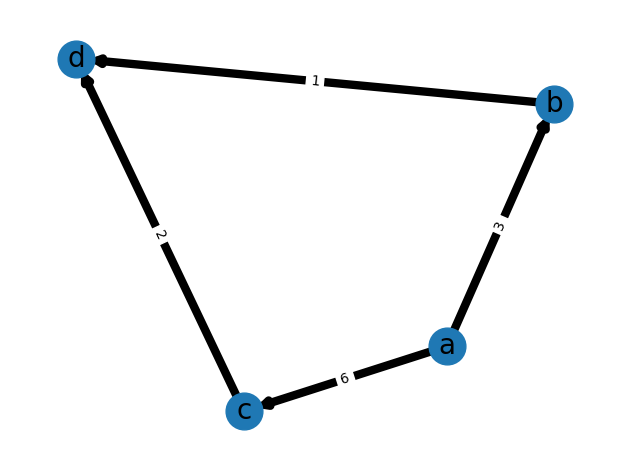

{'a': {'b': 4, 'c': 1}, 'd': {}, 'b': {'d': 4}, 'c': {'d': 1}}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_node('a', demand = -5)
G.add_node('d', demand = 5)
G.add_edge('a', 'b', weight = 3, capacity = 4)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 9)
G.add_edge('c', 'd', weight = 2, capacity = 5)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


flowDict = nx.min_cost_flow(G)

print(flowDict)

# Transport with a percentage of losses.

https://or.stackexchange.com/questions/10582/classic-transportation-problem-with-integrated-losses-during-transport

# 2. Transport with relays (trans -global problem)

Optimization with relay is similar to the optimization of transport, except that there are intermediate relays. In example, the shipping from Paris to Strasbourg via Nancy can be cheaper than direct (non -stop) shipping toStrasbourg.In this model, the costs are <b> linear </b>.

Basic generic optimization:

<div style = "text-align: center">
<IMG SRC = "IMG/TransShipment2.Png"> </ IMG>
</div>

A slightly more complex optimization example:
<div style = "text-align: center">
<IMG SRC = "IMG/Transshipment.png"> </ IMG>
</div>

The LP formulation is also similar, in the sense that it implies an objective to minimize the cost of transport on all arcs, and a set of flow stresses.The first two constraints concern the supply nodes and indicate that the outgoing flow of each supply node must be equal to the capacity of this node, no longer any flow entering this same node.The following two constraints concern the intermediate nodes and indicate that the flow entering an intermediate node must be equal to the flow coming out of this node.The last two constraints concern the request nodes and indicate that the influx in each request node must be equal to the request to this node.The area of variables must be greater than or equal to zero.

A good link:
https://www.youtube.com/watch?

Another good link:
https://twiki.esc.auckland.ac.nz/do/view/opsres/transShipmentproblem

# Mathematical modeling (English)

"The American Steel Transshipment Problem"

<div style="text-align:center">
<img src="img/transshipment_mdl.png"></img>
</div>

with
- S = all factories (suppliers)
- D = set of customers
- T = set of intermediate relays
- A = all possible roads.
- C = cost per road

# Notre problème à résoudre

<div style="text-align:center">
<img src="img/Problem.webp"></img>
</div>

# An example with Pulp

First of all, a version without loops for, then the version with the loops for

In [ ]:
# Import PuLP modeler functions
from pulp import *
 
# variables

# Routes vers les relais intermédaires
x1 = LpVariable('x1', lowBound=0, cat='Integer')
x2 = LpVariable('x2', lowBound=0, cat='Integer')

# Routes des relais intermédaires vers les clients
x3 = LpVariable('x3', lowBound=0, cat='Integer')
x4 = LpVariable('x4', lowBound=0, cat='Integer')
x5 = LpVariable('x5', lowBound=0, cat='Integer')
x6 = LpVariable('x6', lowBound=0, cat='Integer')
x7 = LpVariable('x7', lowBound=0, cat='Integer')
x8 = LpVariable('x8', lowBound=0, cat='Integer')
x9 = LpVariable('x9', lowBound=0, cat='Integer')
x10 = LpVariable('x10', lowBound=0, cat='Integer')
 
# On veut minimiser le coû global de transport
Problem = LpProblem('transshipment_problem',LpMinimize)
 
# La fonction objectif résume le côut de toutes les routes
Problem += 7*x1 + 4*x2 + 6*x3 + 7*x4 + 3*x5 + 9*x6 + 5*x7 + 9*x8 + 7*x9 + 2*x10
 
# Les contraintes
# Production des usines max
Problem += x1 + x2 <= 200

# satisfaction de la demande client
Problem += x3 + x7 == 30
Problem += x4 + x8 == 20
Problem += x5 + x9 == 40
Problem += x6 + x10 == 50

# Loi de kirshoff
Problem += x1 == x3 + x4 + x5 + x6
Problem += x2 == x7 + x8 + x9 + x10
 
# On résouds
Problem.solve()
 
# On imprime le résultat
print('Statut:', LpStatus[Problem.status])
print('Cout total minimisé = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Choix de la route :',i.name, '=', i.varValue)

Statut: Optimal
Cout total minimisé =  1230.0
Choix de la route : x1 = 40.0
Choix de la route : x10 = 50.0
Choix de la route : x2 = 100.0
Choix de la route : x5 = 40.0
Choix de la route : x7 = 30.0
Choix de la route : x8 = 20.0


# The version with the loops for

In [ ]:
# A venir

# - Transshipment with an additional warehouse next to the factories (Dummy).

In this problem, we have no intermediary relays, but a deposit located next to the factories.
In English, it is called "Dummy" depot.



<div style = "text-align: center">
<IMG SRC = "IMG/Transshipment- Dummy.png"> </ img>
</div>

The list of stores is extended and the demand dictionary is extended for fictitious demand requires 900 objects, in order to balance the problem.The list of costs is also extended, to show the cost of "sending to the dummy node" which, realistically, only leaves the stock in warehouses.This can have an associated cost that could have entered here instead of zeros.Note that the solution could always be resolved when there was an unbalanced excess offer.

If a transport problem has more demand than supply, we can balance the problem using a dummy supply node.Note that with excess demand, the problem is "unfeasible" when it is unbalanced.

In [ ]:
import pulp as p

# Créer la liste de toutes les usines
Usines = ["A", "B"]

# Créer un dictionnaire de la capacité de chaque usine
capacite = {"A": 1000, "B": 4000}

# Créer la liste de chaque magasin
Magasins = ["1", "2", "3", "4", "5","D"]

# Créer un dictionnaire de la demande de chaque magasin
demand = {
"1": 500,
"2": 900,
"3": 1800,
"4": 200,
"5": 700,
"D":900
}

# Créer la liste de coûts (matrice) de transports de chaque route d'une usine vers un magasins
# Ce sont les valuations des arcs
couts = [  
# Magasins   # 1  2  3  4  5
        [2, 4, 5, 2, 1,0],  # A   Usines
        [3, 1, 3, 2, 3,0],  # B
     ]
  
# On transforme les coûts en un dictionnaire - https://stackoverflow.com/questions/44527562/how-to-create-a-3-dimensional-dictionary-from-3-lists-in-python
couts = p.makeDict([Usines, Magasins], couts, 0)

# On veut minimiser le cout global de transport, on crée notre problème
prob = p.LpProblem("Distribution_Problem", p.LpMinimize)

# On crée une liste de tuples qui contiennent toutes les routes possibles.
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, b) for w in Usines for b in Magasins]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = p.LpVariable.dicts("Route", (Usines, Magasins), 0, None, p.LpInteger)

# On ajoute d'abord la fonction objectif.
prob += (p.lpSum([vars[w][b] * couts[w][b] for (w, b) in Routes]),"Somme_de_couts_de_transport",)

# The capacite maximum constraints are added to prob for each capacite node (usines)
for w in Usines:
    prob += (p.lpSum([vars[w][b] for b in Magasins]) <= capacite[w],"Somme_des_objets_sortis_de_usine%s" % w,)

# The demand minimum constraints are added to prob for each demand node (magasins)
for b in Magasins:
    prob += (
        p.lpSum([vars[w][b] for w in Usines]) >= demand[b],"Somme_des_objets_aux_magasins%s" % b,)


# On exécute le solveur
prob.solve()

# On affiche le statut de la solution
print ("Status:",p.LpStatus [prob.status])



# Afficher l'optimium de chaques variables items qui s'exprime en unité construites
for v in prob.variables ():
    print (v.name, "=", v.varValue)


# The optimised objective function value is printed to the screen
print ("objectif - coût global minimisé : ", p.value (prob.objective))


Status: Optimal
Route_A_1 = 300.0
Route_A_2 = 0.0
Route_A_3 = 0.0
Route_A_4 = 0.0
Route_A_5 = 700.0
Route_A_D = 0.0
Route_B_1 = 200.0
Route_B_2 = 900.0
Route_B_3 = 1800.0
Route_B_4 = 200.0
Route_B_5 = 0.0
Route_B_D = 900.0
objectif - coût global minimisé :  8600.0


# Adding non -linear parameters to a transport problem

Future !

# 3. Supplier location
In English: Facility Rental

# Description

What could be better than concrete examples to understand quickly?

- It is a question of placing the most judiciously supplier so that it silly as close as possible to all customers.
- It is a question of placing the most judiciously hospital so that the patients are as close as possible.
- It is a question of placing a center of firefighter on the map in order to minimize the waiting time in a perimeter during a fire.
- It is a question of building a police station at the most judicious place so that the agents supposedly as far as possible of the break -in, on an X plan, y given.
- It is a question of building n suppliers for M customers, and that the cost or the overall minimized bristles distance.

# Mathematical description
In a basic formulation, the problem of locating installations consists of a set of potential installation sites where an installation can be opened, and a set of request points of which must be served.The objective is to select a subset F of installations to open, in order to minimize the sum of the distances between each request point and the nearest installation, the more the sum of the opening costs of the installations.

<b> Categories </b>:

- Weber's problem:

Place the supplier as close as possible to n customers.

A simple problem of location of the installations is the problem of Weber, in which only one installation must be placed, the only optimization criterion being the minimization of the weighted sum of distances from a given set of punctual sites.
<div style = "text-align: center">
<IMG SRC = "IMG/FACILITY-Location.PNG"> </ IMG>
</div>



- Suppliers with capacity - CAPACITED FACILITY Rental
The discreet problem of location of suppliers with taking into account capacities is to locate a set of suppliers with a limited capacity to serve a set of customers.Its objective is the minimization of the total cost, which includes the implementation of suppliers and the satisfaction of demand.

Example of CFL:
<div style = "text-align: center">
<IMG SRC = "IMG/FACILITY-LOCE-2.PNG"> </MIG>
</div>

Notes:
In some cases, we will take the fixed construction cost of account, in addition to transport costs.
We can take into account the request of each city, affected by the establishment and other parameters, in some cases, there are several factories (see Wikipedia).A second technique called "capacitated facility rental problem" is to derive a transport problem, but the program will delete 'unnecessary factories (node).

Over time, my notebook will try to offer solutions with Python Cplex or Pulp.

# Mathematical modeling

1. <b> Weber problem </b>

To come


2. <b> The model with several suppliers limited to capacity.(Capacity facility rental) </b>
In this model, we also add the fixed costs of the factories (Balinski (1965)).The factories have a limited capacity, moreover, the number of factories will be minimized by mathematical treatment.

# Solution to the Weber problem with Sklearn

For the moment, we will solve with the Algo of the K-Miders (K-Means), we will see if we can with the solvents in a second step.
The algo determines a centroid, it therefore seems appropriate to me for the Weber problem.

The dataset will therefore be the different stores positioned on a map.
You can search for one or more centrals which will be the location of the suppliers.


c:\Users\secretgirl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[55.1 46.1]
 [29.6 66.8]
 [43.2 16.7]]


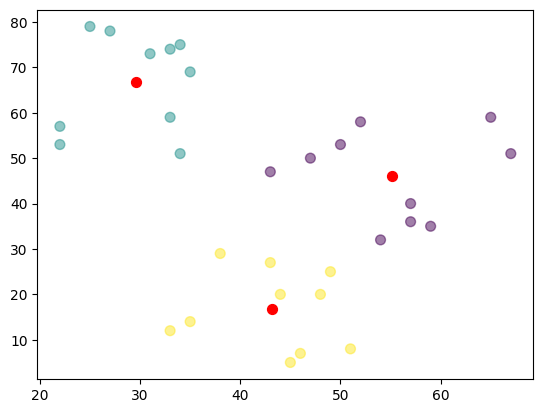

In [ ]:
# a venir

# 1. on importe la lib 
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 2. On crée notre dataset
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
# print (df)

# 3. On utilise l'algoritme KMEANS pour créer nos 3 clusters et repérer nos centroids.
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids) # Coordonnées des centroids

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# A realistic solution with folium

We see that the Kmeans logic is good for positioning our suppliers on the map, but could we rather between longitudes and latitudes and can be displayed a card below?Yes, we can, with Lib Folium.


In [ ]:
import folium
from IPython.display import display
from folium.plugins import Fullscreen
# Create the map object called m which is the base layer of the map
# Center at specific lcation 
# tiles is background layer of the map which you can select from below as well.
# Zoom level = the level you want to zoom at the beginning
m = folium.Map(location=[13.728680652566823, 100.362147071618],
               tiles='CartoDB positron',
               zoom_start=8)#if you need option that user can select background layer of the map
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Watercolor').add_to(m)
folium.TileLayer('CartoDB positron').add_to(m)# We can create other layers to separate our marker or any area we want to draw.
#name= layername that you want to show to user  '<u><b>layer1</b></u>'
# from above <u><b> are just CSS tag which to underline and bold respectively
# any plot on layer 1 will not show at the beginning because of show= False
layer1 = folium.FeatureGroup(name= '<u><b>layer1</b></u>',show= False)
m.add_child(layer1)
layer2 = folium.FeatureGroup(name= '<u><b>layer2</b></u>',show= True)
m.add_child(layer2)# marker 1 #draw marker with corlor you want (default is blue)
# and if you not specific icon , it shows (!)
# put it at base layer
folium.Marker(
        location=[13.82868065256, 100.3621470],
        title = 'marker1 at base',
        popup = 'marker1 at base',
        icon= folium.Icon(color='red')).add_to(m)
        
# marker 2 #draw marker with default marker
# put it to layer1 which will not show at the beginning
folium.Marker(
        location=[13.72868065256, 100.6621470],
        title = 'marker2 at layer1',
        popup = 'marker2 at layer1').add_to(layer1)# marker 3 #draw marker with corlor you want and assigned icon
# and if you not specific icon , it shows (!)
# put it at layer2
folium.Marker(
        location=[13.718685256, 100.3621470],
        title = 'marker1 at layer2',
        popup = 'marker1 at layer2',
        icon= folium.Icon(color='green',icon='ok-sign')).add_to(layer2)# to let the map have full screen button
Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',).add_to(m)# to let the map have selectd layer1 layer2 you created
folium.LayerControl(collapsed=True,position= 'bottomright').add_to(m)# save it to html then we can send the file to our colleagues
m.save('mymap.html')
display(m)

# An example of minimum supplier coverage (Minimal Numbers of Facility Locations)

In [ ]:
# Exemple 2 - https://stackoverflow.com/questions/65684576/pulp-how-to-structure-this-factory-coverage-problem

""" Chaque ville est peuplée d'un nombre N de personnes.
Chaque emplacement de fournisseur peut fournir un ensemble de villes.
Minimiser le nombre d'usines à ouvrir, de sorte que le nombre de personnes facilitées soit >= 4000
 """


import pulp as pl

cities = ['London', 'Paris', 'Berlin', 'Amsterdam', 'Vienna', 'Prague']
factories = ['A', 'B', 'C', 'D']
city_populations = {'London': 898, 'Paris': 222, 'Berlin': 767, 'Amsterdam': 111, 'Vienna': 854, 'Prague': 908}
factories_service = {'A': ['London', 'Prague'], 'B': ['London', 'Paris', 'Vienna'], 'C': ['Amsterdam', 'Vienna', 'Prague'], 'D': ['London', 'Vienna', 'Prague']}

prob = pl.LpProblem("Factory_Coverage",pl.LpMinimize)

factories_vars = pl.LpVariable.dicts("Factories", factories, cat='Binary')
cities_vars = pl.LpVariable.dicts("Cities", cities, cat='Binary')

# La fonction objectif
prob += pl.lpSum(factories_vars)

# La population servie > 2000
prob += pl.lpSum([city_populations[c]*cities_vars[c] for c in cities]) >= 2000

# La ville est désservie seulement si il y a une usine qui la dessert
# City is served only if there is a factory that serves it
bigM = len(factories)
for c in cities:
    prob +=  bigM * cities_vars[c] >= pl.lpSum([factories_vars[f] for f in factories_vars if c in factories_service[f]])
    prob +=  cities_vars[c] <= pl.lpSum([factories_vars[f] for f in factories_vars if c in factories_service[f]])

prob.solve()



for f in factories_vars:
    print(f, factories_vars[f].value())
for c in cities_vars:
    print(c, cities_vars[c].value())

# The optimised objective function value is printed to the screen
print ("objectif - coût global minimisé : ",  (prob.objective))


A 0.0
B 0.0
C 0.0
D 1.0
London 1.0
Paris 0.0
Berlin 0.0
Amsterdam 0.0
Vienna 1.0
Prague 1.0
objectif - coût global minimisé :  Factories_A + Factories_B + Factories_C + Factories_D


# Capacited facility location : Exemple avec Pulp

Voici le code pour faire une optimisation capacited facility location.

- On a 3 fournisseurs, 5 clients.
- On a la demande des clients : 80,270,250,160,180.
- On a Les coûts fixes d'installation des fournisseurs et leurs capacité maximum.
- On a les coûts de transport vers chaque client.

In [ ]:
from pulp import *

# LListe des clients et fournisseurs
Customer = [1,2,3,4,5]
Facility = ['Fac-1', 'Fac-2', 'Fac-3']

# Dictionnaires des demandes et capacité et coût engendré par les fournisseurs
Demand = {1 : 80, 2 : 270, 3 : 250, 4 : 160, 5 : 180}
Max_Supply = {'Fac-1' : 500, 'Fac-2' : 500, 'Fac-3' : 500} 
fixed_cost = {'Fac-1' : 1000, 'Fac-2' : 1000, 'Fac-3' : 1000 }

# Dictionnaire des coûts de transports entre les clients et les fournisseurs
transportation_cost = {'Fac-1' : {1 : 4, 2 : 5, 3 : 6, 4 : 8, 5 : 10},
                       'Fac-2' : {1 : 6, 2 : 4, 3 : 3, 4 : 5, 5 : 8},
                       'Fac-3' : {1 : 9, 2 : 7, 3 : 4, 4 : 3, 5 : 4}
                      }

# On crée notre problème de minimisation
prob = LpProblem("Capacitated_Facility_Location_Problem", LpMinimize)

# On définit les variables de décision
use_facility = LpVariable.dicts("Use Facility", Facility, 0, 1, LpBinary)
ser_customer = LpVariable.dicts("Service", [(i,j) for i in Customer for j in Facility], 0)

# On définit la fonction objectif :minimiser la somme des coûts fixes et coûts variables ( Coûts de transport)
prob += lpSum(fixed_cost[j]*use_facility[j] for j in Facility) + lpSum(transportation_cost[j][i]*ser_customer[(i,j)] for j in Facility for i in Customer)

# Les contraintes

# On doit satisfaire la demande client
for i in Customer:
    prob += lpSum(ser_customer[(i,j)] for j in Facility) == Demand[i]

# On ne peut pas dépasser la capacité des fournisseurs
for j in Facility:
    prob += lpSum(ser_customer[(i,j)] for i in Customer) <= Max_Supply[j]*use_facility[j]

# 
for i in Customer:
    for j in Facility:
        prob += ser_customer[(i,j)] <= Demand[i]*use_facility[j]

prob.solve()

print("Solution Status = ", LpStatus[prob.status])



# Print the solution of Binary Decision Variables
Tolerance = 0.0001
for j in Facility:
    if use_facility[j].varValue > Tolerance:
        print("Créer un Fournisseur au site = ", j)




# ON imprime les solution des variables continues
for v in prob.variables():
    print(v.name, "=", v.varValue)


# On imprime le coût total minimisé 
print("Coût total minimisé = ", value(prob.objective))

Solution Status =  Optimal
Créer un Fournisseur au site =  Fac-2
Créer un Fournisseur au site =  Fac-3
Service_(1,_'Fac_1') = 0.0
Service_(1,_'Fac_2') = 80.0
Service_(1,_'Fac_3') = 0.0
Service_(2,_'Fac_1') = 0.0
Service_(2,_'Fac_2') = 270.0
Service_(2,_'Fac_3') = 0.0
Service_(3,_'Fac_1') = 0.0
Service_(3,_'Fac_2') = 150.0
Service_(3,_'Fac_3') = 100.0
Service_(4,_'Fac_1') = 0.0
Service_(4,_'Fac_2') = 0.0
Service_(4,_'Fac_3') = 160.0
Service_(5,_'Fac_1') = 0.0
Service_(5,_'Fac_2') = 0.0
Service_(5,_'Fac_3') = 180.0
Use_Facility_Fac_1 = 0.0
Use_Facility_Fac_2 = 1.0
Use_Facility_Fac_3 = 1.0
Coût total minimisé =  5610.0


# 4. Assignments (assignment)

- Introduction :

Affectance type optimizations allow for example to allocate N employees with different tasks, while minimizing the overall cost of employment.
One can also think assigns such or such groups with such projects under various constraints.
Machines can also be assigned to tasks under various constraints.
We can assign teachers to lessons, students with bus transport, a cheapest road plan for a company of cars, etc ...

<div style = "text-align: center">
<img src = "img/assignment.png">
</div>

- The basic problem:

I have 3 employees I and 3 J tasks to be performed, each employee has a different cost per task J,
How to affect employees to reduce the overall cost of hiring?
<div style = "text-align: center">
<img src = "img/assign01.gif">
</div>

# Variants

Already, it is distinguished that J Tasks may have to be repeated n times.
The concept of duration of the task is not present in the basic case, however, it may be taken into account.
It is also possible to impose mutuality: an employee must necessarily carry out the B2 task, with another employee (min employees = 2 for 1 task given).
All this involves manipulating solvents and mathematical models with precision.

We therefore summarize the variants, in order to code them then:

- A task J could have to be repeated M times.
- I could be performed by K Employees
- The durations of J tasks could influence the result.
- We can avoid an employee I will carry out a specifying jache, because it is incapable of it.

# Mathematical modeling

- Let i be a set of employees {i1, i2, i3 ... in}
- Let j a set of tasks {J1, J2, J3 .... Jn}
- Let I be a given employee
- Let J is a given task
- either CIJ the cost of an employee between a node i and j for any stop ij
- Let K be all possible edges
- Either Vij the binary variable of choice


# Resolution of the basic problem with Pulp
We solve our basic problem exposed a little higher, with Pulp.
<div style = "text-align: center">
<img src = "img/assign01.gif">
</div>

In [ ]:
# Import
from pulp import *

employes=["Andre","Philippe","Mohammed"]
taches=["B1","B2","B3"]

# Matrice des coûts
couts=[[1,4,5],
      [5,7,6],
      [5,8,8]]

# C'est un problème de minimisation
prob = LpProblem("probleme_Affectation_lineaire", LpMinimize) 

# Les datas de couts sont transformés en un dictionnaire
costs= makeDict([employes,taches], couts, 0)

# On crée une liste de tuples qui contiennent tous les assignements possibles
assign = [(w, j) for w in employes for j in taches]

# Un dictionnaire appelé "vars" est créé pour contenir les variables référencées
vars = LpVariable.dicts("Affectation", (employes, taches), 0, None, LpBinary)

# La fonction objectif est toujours ajoutée en premier
prob += (
    lpSum([vars[w][j] * costs[w][j] for (w, j) in assign]),
    "Somme_couts_affectations",
)

# Il y a des contraintes lignes, chaque tâche peut être assignée à seulement 1 employé
for j in taches:
    prob+= lpSum(vars[w][j] for w in employes) == 1

# Il y a des contraintes colonnes, chaque employé peut être assigné à seulement un emploi.
for w in employes:
    prob+= lpSum(vars[w][j] for j in taches) == 1

# On résouds le pb, et on peut choisir le solveur entre les parenthèses
prob.solve()

# On imprime les variables qui ont leur valeur optimisées
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)
    
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Cout total des employes pour le projet = ", value(prob.objective))

Affectation_Andre_B2 = 1.0
Affectation_Mohammed_B1 = 1.0
Affectation_Philippe_B3 = 1.0
Cout total des employes pour le projet =  15.0


# Resolution of the basic problem with Google or Tools

We solve the basic problem with Google Or Tools and we check that we find the same as with Python Pulp.And indeed, this is the case.

Here is the right link for assignment problems:
https://developers.google.com/optimization/assignment/assignment_example?hl=fr

In [ ]:
from ortools.linear_solver import pywraplp


def main():
    # Data
    costs = [[1,4,5],
      [5,7,6],
      [5,8,8]]
    # Le nb d'employés est de la taille du tableau costs
    num_workers = len(costs)
    # Le nombre de tâches est de la taille de la pemière ligne du tableau costs
    num_tasks = len(costs[0])

    # Solver
    # Créez le solveur mip avec le backend SCIP.
    solver = pywraplp.Solver.CreateSolver('SCIP')

    if not solver:
        return

    #Variable
    # x[i, j] est un tableau de 0-1 variables, qui vaudra 1
    # si le travailleur i est affecté à la tâche j.
    x = {}
    for i in range(num_workers):
        for j in range(num_tasks):
            x[i, j] = solver.IntVar(0, 1, '')

    # Constraintes
    # Il y a des contraintes lignes, chaque tâche peut être assignée à seulement 1 employé
    for i in range(num_workers):
        solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1)

   # Il y a des contraintes colonnes, chaque employé peut être assigné à seulement un emploi.
    for j in range(num_tasks):
        solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

    # Objectif
    objective_terms = []
    for i in range(num_workers):
        for j in range(num_tasks):
            objective_terms.append(costs[i][j] * x[i, j])
    solver.Minimize(solver.Sum(objective_terms))

    # Solve
    status = solver.Solve()

    # On imprime la solution
    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print(f'Total cost = {solver.Objective().Value()}\n')
        for i in range(num_workers):
            for j in range(num_tasks):
                # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
                if x[i, j].solution_value() > 0.5:
                    print(f'Worker {i} assigned to task {j}.' +
                          f' Cost: {costs[i][j]}')
    else:
        print('No solution found.')


if __name__ == '__main__':
    main()

Total cost = 15.0

Worker 0 assigned to task 0. Cost: 1
Worker 1 assigned to task 2. Cost: 6
Worker 2 assigned to task 1. Cost: 8


# 1 st variant.

We want to perform each tasks 5 times by <b> the same </b> used J, and always minimize the overall cost of hires.

<div style = "text-align: center">
<img src = "img/assign02.gif">
</div>
If we try to solve by hand, we tell ourselves that we will affect André to B1, since it is the cheapest, but the problem is that then, the costs of Philippe and Mohammed make it get too expensive.
The solver minimizes the solution and offers an overall cost of 75.


Hand tests:

Andre * B1 = 5
Philippe * B3 = 35
Mohammed * B2 = 45
Total: 85 (too expensive)

Andre * B1 = 5
Mohammed * B3 = 40
Philippe * B2 = 35
Total: 80 (too expensive)

Solver result:
Andre * B2 = 20
Philippe * B3 = 30
Mohammed * B1 = 25
Total = 75

In [ ]:
# Import
from pulp import *

employes=["Andre","Philippe","Mohammed"]
taches=["B1","B2","B3"]

# Matrice des coûts
couts=[[1,4,5],
      [5,7,6],
      [5,8,8]]

# C'est un problème de minimisation
prob = LpProblem("probleme_Affectation_lineaire", LpMinimize) 

# Les datas de couts sont transformés en un dictionnaire
costs= makeDict([employes,taches], couts, 0)

# On crée une liste de tuples qui contiennent tous les assignements possibles
assign = [(w, j) for w in employes for j in taches]

# Un dictionnaire appelé "vars" est créé pour contenir les variables référencées
vars = LpVariable.dicts("Affectation", (employes, taches), 0, None, LpInteger)

# La fonction objectif est toujours ajoutée en premier
prob += (
    lpSum([vars[w][j] * costs[w][j] for (w, j) in assign]),
    "Somme_couts_affectations",
)

# Il y a des contraintes lignes, chaque tâche **doit**  être assignée 5 fois
for j in taches:
    prob+= lpSum(vars[w][j] for w in employes) >= 5

# Il y a des contraintes colonnes, chaque employé **peut** être assigné 5 fois
for w in employes:
    prob+= lpSum(vars[w][j] for j in taches) >= 5

# On résouds le pb, et on peut choisir le solveur entre les parenthèses
prob.solve()

# On imprime les variables qui ont leur valeur optimisées
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)
    
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Cout total des employes pour le projet = ", value(prob.objective))

Affectation_Andre_B2 = 5.0
Affectation_Mohammed_B1 = 5.0
Affectation_Philippe_B3 = 5.0
Cout total des employes pour le projet =  75.0


# 2nd variant

We now want each task J to be performed by several employees, and reduce the overall hiring side.

<div style = "text-align: center">
<img src = "img/assign02.gif">
</div>

We see that André is selected several times on several tasks because it is the cheapest employee, the total cost of the project is then reduced to its maximum, but André is "overbooked".
In the code, you can force Mohammed to be selected several times using his index.

In [ ]:
# Import
from pulp import *

employes=["Andre","Philippe","Mohammed"]
taches=["B1","B2","B3"]

# Matrice des coûts
couts=[[1,4,5],
      [5,7,6],
      [5,8,8]]

# C'est un problème de minimisation
prob = LpProblem("probleme_Affectation_lineaire", LpMinimize) 

# Les datas de couts sont transformés en un dictionnaire
costs= makeDict([employes,taches], couts, 0)

# On crée une liste de tuples qui contiennent tous les assignements possibles
assign = [(w, j) for w in employes for j in taches]

# Un dictionnaire appelé "vars" est créé pour contenir les variables référencées
vars = LpVariable.dicts("Affectation", (employes, taches), 0, None, LpInteger)

# La fonction objectif est toujours ajoutée en premier
prob += (
    lpSum([vars[w][j] * costs[w][j] for (w, j) in assign]),
    "Somm_couts_affectations",
)

# Il y a des contraintes lignes, chaque tâche doit être assignée 5 fois
for j in taches:
    prob+= lpSum(vars[w][j] for w in employes) >= 5

# Il y a des contraintes colonnes, chaque employé doit être assigné , et peut être assigné plus d' 1 fois
for w in employes:
    prob+= lpSum(vars[w][j] for j in taches) >= 1

# On résouds le pb, et on peut choisir le solveur entre les parenthèses
prob.solve()

# On imprime les variables qui ont leur valeur optimisées
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)
    
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Cout total des employes pour le projet = ", value(prob.objective))

Affectation_Andre_B1 = 5.0
Affectation_Andre_B2 = 5.0
Affectation_Andre_B3 = 3.0
Affectation_Mohammed_B3 = 1.0
Affectation_Philippe_B3 = 1.0
Cout total des employes pour le projet =  54.0


# 3rd variant.

The durations of the tasks could affect the end result.

<div style = "text-align: center">
<img src = "img/assign03.gif">
</div>

# 5. Project management.

# Introduction.

In a project, nodes are tasks and stops the duration.
The constraints are mainly the previous ones of the tasks.

Read my notebook 06. Optimization in project management to find out more ...

# 6. Coverage problems.

## Our basic example.

We have a set S {1,2,3,4.5}.

We have various subsections: {1,2} {1,2,3}, {3.4}, {2,4.5}, {1,4.5}, {3,4.5},{5}

We want to minimize the number of sub -sets capable of covering all the values of S.

If we choose {1,2}, {3.4} and {5}, we covered all the values of S with 3 under sets, but there is a better solution: {1,2} and {3,4.5} which makes a total of 2 under ensembles.But we also notice that, if we accept the duplicates, the couple {1,2,3} and {3,4.5} covers the S.

## Mathematical modeling.

Future !

## Solution avec l'algo Glouton (Greedy)

In [ ]:
ensemble = set(["1", "2", "3", "4", "5"])

sous_ensemble = {}

sous_ensemble["se1"] = set(["1", "2"])
sous_ensemble["se2"] = set(["1", "2", "3"])
sous_ensemble["se3"] = set(["3", "4"])
sous_ensemble["se4"] = set(["2", "4", "5"])
sous_ensemble["se5"] = set(["1", "4", "5"])
sous_ensemble["se6"] = set(["3", "4", "5"])
sous_ensemble["se7"] = set(["5"])

final_sous_ensemble = set()

while ensemble:
  meilleur_sous_ensemble = None
  sous_ensemble_non_couverts = set()
  
  for s_e, e_for_s_e in sous_ensemble.items():
    covered = ensemble & e_for_s_e
    if len(covered) > len(sous_ensemble_non_couverts):
      meilleur_sous_ensemble = s_e
      sous_ensemble_non_couverts = covered

  ensemble -= sous_ensemble_non_couverts
  final_sous_ensemble.add(meilleur_sous_ensemble)

print(final_sous_ensemble)

{'se2', 'se4'}


## Explication

C'est un algorithme glouton, l'intersection d'ensemble permet d'être le "plus gourmand" à chaque étape, en choisissant l'ensemble qui couvre le plus (c'est-à-dire qui a la plus grande intersection) des éléments de l'ensemble qui n'ont pas été couverts. Dans la preuve formelle du coût de cet algorithme d'approximation gourmande par rapport à l'algorithme optimal (force brute), l'intersection d'ensembles est utilisée pour relier le "prix" payé pour chaque élément des ensembles choisis au nombre d'ensembles choisis.


# Coverage by under sets minimum

## Description

https://optimization.cbe.cornell.edu/index.php?ttle=set_covering_Problem

The problem of optimal location

This set of coverage problems concerns the maximization of the coverage of certain public facilities placed in different places.Consider the problem of placing fire station to serve the districts of a city.If each fire station can serve its city and all the adjacent cities, we can formulate an overall cover problem where each subset consists of a set of adjacent cities.The problem is then resolved to minimize the number of fire station necessary to serve the whole city.

Let yi be the decision variable corresponding to the choice to build a fire station in the I.Either if a subset of cities including district I and all its neighbors.The problem is then formulated as follows.

<IMG SRC = "IMG/DFC752C9F2198C8841D836C1B8C59B5F96C3BC.SVG">

## Example 1: Select the neighborhood (s) that covers a whole plan

Imagine a city with 5 neighborhoods.

- district 1 is adjacent with 2 and 5 (and with itself)
- district 2 is adjacent with 1 and 5 (and with itself)
- district 3 is adjacent with 4 (and with itself)
- The district 4 is adjacent with 5 (and with itself)
- the district 5 is adjacent with 1 and 2 and 3 and 4 (and with itself) -> It is so this one to choose

So, if you have to place a distributor, it must be placed in the district 5.

# Solution with Pulp

Let's see if Pulp correctly selects the minimum number of neighborhoods.

In [ ]:
from pulp import *
 
Q1 = LpVariable('Q1', lowBound=0, cat='Binary')
Q2 = LpVariable('Q2', lowBound=0, cat='Binary')
Q3 = LpVariable('Q3', lowBound=0, cat='Binary')
Q4 = LpVariable('Q4', lowBound=0, cat='Binary')
Q5 = LpVariable('Q5', lowBound=0, cat='Binary')

# La matrice est là pour indication , mais normalement, on doit s'en servir dans le 
# code python
adjacence_matrix = [
   # Q1,Q2,Q3,Q4,Q5
    [1, 1, 0, 0, 1], # Q1
    [1, 1, 0, 0, 1], # Q2
    [0, 0, 1, 0, 1], # Q3
    [0, 0, 0, 1, 1], # Q4
    [1, 1, 1, 1, 1], # Q5
]

Problem = LpProblem('set_covering',LpMinimize)

# Objective
Problem += Q1 + Q2 + Q3 + Q4 + Q5

# Constraints
Problem += Q1 + Q2 + Q5 >= 1
Problem += Q1 + Q2 + Q5 >= 1
Problem += Q3 + Q5 >= 1
Problem += Q4 + Q5 >= 1
Problem += Q1 + Q2 + Q3 + Q4 + Q5 >= 1


Problem.solve()
 
print('Objectif = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Selection:',i.name, '=', i.varValue)

Objectif =  1.0
Selection: Q1 = 0.0
Selection: Q2 = 0.0
Selection: Q3 = 0.0
Selection: Q4 = 0.0
Selection: Q5 = 1.0


Si par contre, on enlêve une adjacence au quartier 5 qui touchait tous les quartiers, alors on obtient une sélection différente :
On précise au solveur que le quartier 1 ne touche plus le quartier 5 ,
On voit que le solveur pour établir la couverture totale choisit désormais le quartier 1 et 5.

In [ ]:
from pulp import *
 
Q1 = LpVariable('Q1', lowBound=0, cat='Binary')
Q2 = LpVariable('Q2', lowBound=0, cat='Binary')
Q3 = LpVariable('Q3', lowBound=0, cat='Binary')
Q4 = LpVariable('Q4', lowBound=0, cat='Binary')
Q5 = LpVariable('Q5', lowBound=0, cat='Binary')

# La matrice est là pour indication , mais normalement, on doit s'en servir dans le 
# code python
adjacence_matrix = [
   # Q1,Q2,Q3,Q4,Q5
    [1, 1, 0, 0, 0], # Q1
    [1, 1, 0, 0, 1], # Q2
    [0, 0, 1, 0, 1], # Q3
    [0, 0, 0, 1, 1], # Q4
    [0, 1, 1, 1, 1], # Q5
]

Problem = LpProblem('set_covering',LpMinimize)

# Objective
Problem += Q1 + Q2 + Q3 + Q4 + Q5

# Constraints
Problem += Q1 + Q2  >= 1
Problem += Q1 + Q2 + Q5 >= 1
Problem += Q3 + Q5 >= 1
Problem += Q4 + Q5 >= 1
Problem += Q2 + Q3 + Q4 + Q5 >= 1


Problem.solve()
 
print('Objectif = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Selection:',i.name, '=', i.varValue)

Objectif =  2.0
Selection: Q1 = 1.0
Selection: Q2 = 0.0
Selection: Q3 = 0.0
Selection: Q4 = 0.0
Selection: Q5 = 1.0


## Example 2: Select the minimum number of cameras to cover an entire city

Let us admit that I have a certain number of adjacent streets, how to place the minimum number of cameras while having a total coverage of each streets (and, therefore, optimal surveillance), in order to save money, because theCameras, is it expensive?

## Our example
For the concrete example, we do not bother, and we directly take that of Wikipedia from Cornell University, in English, we want the minimum installation of surveillance cameras, under the constraint of the full coverage of aSports stadium.
If we place them in the little happiness, we will spend too much and we will probably not have a full coverage of the stadium, in addition!

The link: https://optimization.cbe.cornell.edu/index.php?tle=set_covering_Problem

<b> Covers by stadium zones </b>

<div style = "text-align: center">
<img src = "img/cam_location1.png">
</div>

<b> The covers expressed as binary variables </b>

<div style = "text-align: center">
<img src = "img/cam_location2.png">
</div>

## Mathematical modeling

- Let Z be a set of 8 cameras {Z1, Z2, Z3 .... Z8}.
- Let j a set of 15 zones of the stadium {J1, J2, J3, J4 ... J15}.
- either ZJ a binary variable which indicates whether a camera is installed in a ji zone of the stadium
Zj = 1 If it is installed, zj = 0 if it is not installed.
 

<b> The objective </b>:
It is to minimize the sum of ZJ

<b> The constraints </b>:
For each zone I of stadium (these are J1, J2, J3 ... J15), there is a constraint that I must be covered by at least one camera.

For example, for zone 1 of the stadium, Z1 + Z4 + Z7 + Z8> = 1
And for zone 2 of the stadium, z3 + z4 + z7 + z8> = 1

## Solution with Python Pulp
The result is the same as that of Cornel University

In [ ]:
from pulp import *
 
CAM1 = LpVariable('CAM1', lowBound=0, cat='Binary')
CAM2 = LpVariable('CAM2', lowBound=0, cat='Binary')
CAM3 = LpVariable('CAM3', lowBound=0, cat='Binary')
CAM4 = LpVariable('CAM4', lowBound=0, cat='Binary')
CAM5 = LpVariable('CAM5', lowBound=0, cat='Binary')
CAM6 = LpVariable('CAM6', lowBound=0, cat='Binary')
CAM7 = LpVariable('CAM7', lowBound=0, cat='Binary')
CAM8 = LpVariable('CAM8', lowBound=0, cat='Binary')


Problem = LpProblem('couverture_de_cameras_minimale',LpMinimize)

# Objectif :
# Minimiser le nombre de caméras qui sont des variables binaires prenant la valeur 1 ou 0
Problem += CAM1 + CAM2 + CAM3 + CAM4 + CAM5 + CAM6 + CAM7 + CAM8

# Constraintes.
# Ces contraintes sont pour chaque zone de stade
# On écrit bêtement le tableau binaire montré plus haut.
Problem += CAM1 + CAM4 + CAM7 + CAM8  >= 1
Problem += CAM3 + CAM4 + CAM7 + CAM8  >= 1
Problem += CAM1 + CAM5  >= 1
Problem += CAM1 + CAM2 + CAM8  >= 1
Problem += CAM3  >= 1
Problem += CAM1 + CAM5 + CAM7 + CAM8  >= 1
Problem += CAM1 + CAM2  >= 1
Problem += CAM2 + CAM6 + CAM8  >= 1
Problem += CAM3  >= 1
Problem += CAM5  >= 1
Problem += CAM3 + CAM7  >= 1
Problem += CAM2 + CAM5 + CAM8 >= 1
Problem += CAM3 >= 1 # Oui c'est en doublon
Problem += CAM4 + CAM5 + CAM6 >= 1
Problem += CAM4 + CAM6 >= 1

Problem.solve()
 
print('nombre de caméras minimisé = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Selection de la caméra:',i.name, '=', i.varValue)

nombre de caméras minimisé =  4.0
Selection de la caméra: CAM1 = 0.0
Selection de la caméra: CAM2 = 1.0
Selection de la caméra: CAM3 = 1.0
Selection de la caméra: CAM4 = 1.0
Selection de la caméra: CAM5 = 1.0
Selection de la caméra: CAM6 = 0.0
Selection de la caméra: CAM7 = 0.0
Selection de la caméra: CAM8 = 0.0


## COVER ON MINIMUM SETTING WITH TOGNATE OF WEIGHT

In [ ]:
# A venir !

#  Liens

Transport:

- https://www.coin-or.org/PuLP/CaseStudies/a_transportation_problem.html
- https://github.com/hakeemrehman/Python-PuLP-/blob/master/Transportation%20Problem%20(PUNJAB%20FLOUR%20Mill).ipynb

Transshipment:

- https://learnwithpanda.com/2021/01/26/how-to-solve-linear-programming-lp-problems-using-python/

Facility location:

    - Uncapacited facility location:
        - https://github.com/Jeevesh28/Facility-Location-Problem
        - https://www.dcc.fc.up.pt/~jpp/mad1920/teorica-17_int-programming-07.pdf

- http://ibmdecisionoptimization.github.io/docplex-doc/mp/chicago_coffee_shops.html
- https://github.com/xNok/OR_location_routing_problem_study/tree/master        
- https://en.wikipedia.org/wiki/Facility_location_problem
- https://scipbook.readthedocs.io/en/latest/flp.html
- http://www.fedoa.unina.it/9474/1/Barbati_Maria_25.pdf
- https://towardsdatascience.com/optimization-capacitated-facility-location-problem-in-python-57c08f259fe0

Assignment:

- https://www.youtube.com/watch?v=KsX44rMkqcc
- https://machinelearninggeek.com/solving-assignment-problem-using-linear-programming-in-python/

Set cover: 

- https://en.wikipedia.org/wiki/Set_cover_problem



Frameworks d'optimisation:
- SCIP Optimization Suite - pyscipopt

Liens généraux: 
- https://developers.google.com/optimization/routing
- https://www.ibm.com/docs/en/icos/20.1.0?topic=cplex-python-examples
- https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/03.01-Transportation-Networks.html
- https://machinelearninggeek.com/solving-transportation-problem-using-linear-programming-in-python/
- https://gist.github.com/michiru123/59703138a1acc4c151cd9718ed824928
- https://scipbook.readthedocs.io/en/latest/intro.html#transportation-problem
- https://www.scipopt.org/index.php#welcome